# Transformadas discretas

<p align="center">
  <img src="Imagens/logo_virtus2.png" width="300"/>
</p>

# Sumário

[1. Transformada de Fourier discreta (DFT)](#1-transformada-de-fourier-discreta-dft)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Propriedades da DFT](#1-1-propriedades-da-dft)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1.1 Periodicidade e Simetria](#1-1-1-periodicidade-e-simetria)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1.2 Convolução circular](#1-1-2-convolucao-circular)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Método de Sobreposição e Soma](#1-2-metodo-de-sobreposicao-e-soma)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Método de Sobreposição e Armazenamento](#1-3-metodo-de-sobreposicao-e-armazenamento)




## 1. Tranformada de Fourier discreta (DFT)

A tranformada de Fourier discreta é caracterizada como sendo o processo de amostragem da transmforada de fourier, periódica em $2\pi$ tomando-se N amostras uniformemente espaçadas entre 0 e $2\pi$. Utilizando as frequências $\omega _k = (2\pi /N) k, \quad k \in \mathbb{Z}$, tal que:

$$
X'(e^{j\omega}) = X(e^{j\omega}) \sum_{k=-\infty}^{\infty} \delta\left(\omega - \frac{2\pi}{N}k\right) \tag{1}
$$

Aplicando o teorema da convolução e a transformada inversa às amostras obtidas, nós podemos relacionar o sinal $x(t)$cuja transformada de Fourier é $X(j\omega)$ com o sinal $x'(t)$ obtido a partir da amostragem o espectro do sinal de $x(t)$ de tamanho L da seguinte forma:

$$
x'(n) = x(n) * \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} \delta(n - Np) = \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} x(n - Np) \tag{2}
$$

Essa equação mostra que o sinal $x'(t)$ é composto por repetições periódicas do sinal discreto original $x(n)$, em que o período é dado por $N$. Logo, o sinal só pode er recuperado se seu tamanho $L\leq N$

Podemos recuperar o sinal discreto original a partir das amostras de seu espectro pela relação:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X\left(e^{j\left(\frac{2\pi}{N}\right)k}\right) e^{j\left(\frac{2\pi}{N}\right)kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{3}
$$

Esssa relação é conhecida como Tranformada de Fourier Discreta Inversa (IDFT)

Se definirmos $W_N = e^{-j2\pi /N}$,as definições da DFT e da IDFT se tornam:

$$
X(k) = \sum_{n=0}^{N-1} x(n)\, W_N^{kn}, \quad \text{para } 0 \leq k \leq N - 1. \tag{4}
$$

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k)\, W_N^{-kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{5}
$$

em que tanto $x(n)$ como $X(k)$ são periódicas com período N

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def DFT(x, N):
    '''Compute the N-point Discrete Fourier Transform of a 1D array x with length L.
    If N > L, zero-pad x to length N.
    
    Parameters:
    x : 1D array
    N : int        Length of the DFT.

    Returns:
    X : 1D array   DFT of x.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    X = np.zeros(N, dtype=complex)
    if len(x) < N:
        x = np.pad(x, (0, N - len(x)), 'constant') # Zero-padding
    for k in range(N):
        for n in range(len(x)):
            X[k] += x[n] * W_N**(k*n)

    return X

def IDFT(X, N):
    '''Compute the N-point Inverse Discrete Fourier Transform of a 1D array X with length N.

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * W_N**(-k*n)
    return (1/N)*x


Comparison with numpy.fft:

N = 100,k =  0.000000: Max Error:   1.0617e-12, Mean Error:   6.9383e-14
N = 100,k =  0.500000: Max Error:   1.0888e-12, Mean Error:   7.1079e-14
N = 100,k =  1.500000: Max Error:   1.1213e-12, Mean Error:   7.5459e-14
N = 100,k =  3.000000: Max Error:   1.1253e-12, Mean Error:   8.3668e-14
N = 200,k =  0.000000: Max Error:   2.0449e-11, Mean Error:   6.3161e-13
N = 200,k =  0.500000: Max Error:   2.0546e-11, Mean Error:   6.7203e-13
N = 200,k =  1.500000: Max Error:   2.0800e-11, Mean Error:   8.2795e-13
N = 200,k =  3.000000: Max Error:   2.1148e-11, Mean Error:   1.0881e-12
N = 400,k =  0.000000: Max Error:   1.0561e-11, Mean Error:   3.3311e-13
N = 400,k =  0.500000: Max Error:   1.0607e-11, Mean Error:   3.5103e-13
N = 400,k =  1.500000: Max Error:   1.0743e-11, Mean Error:   4.2781e-13
N = 400,k =  3.000000: Max Error:   1.0940e-11, Mean Error:   5.5916e-13


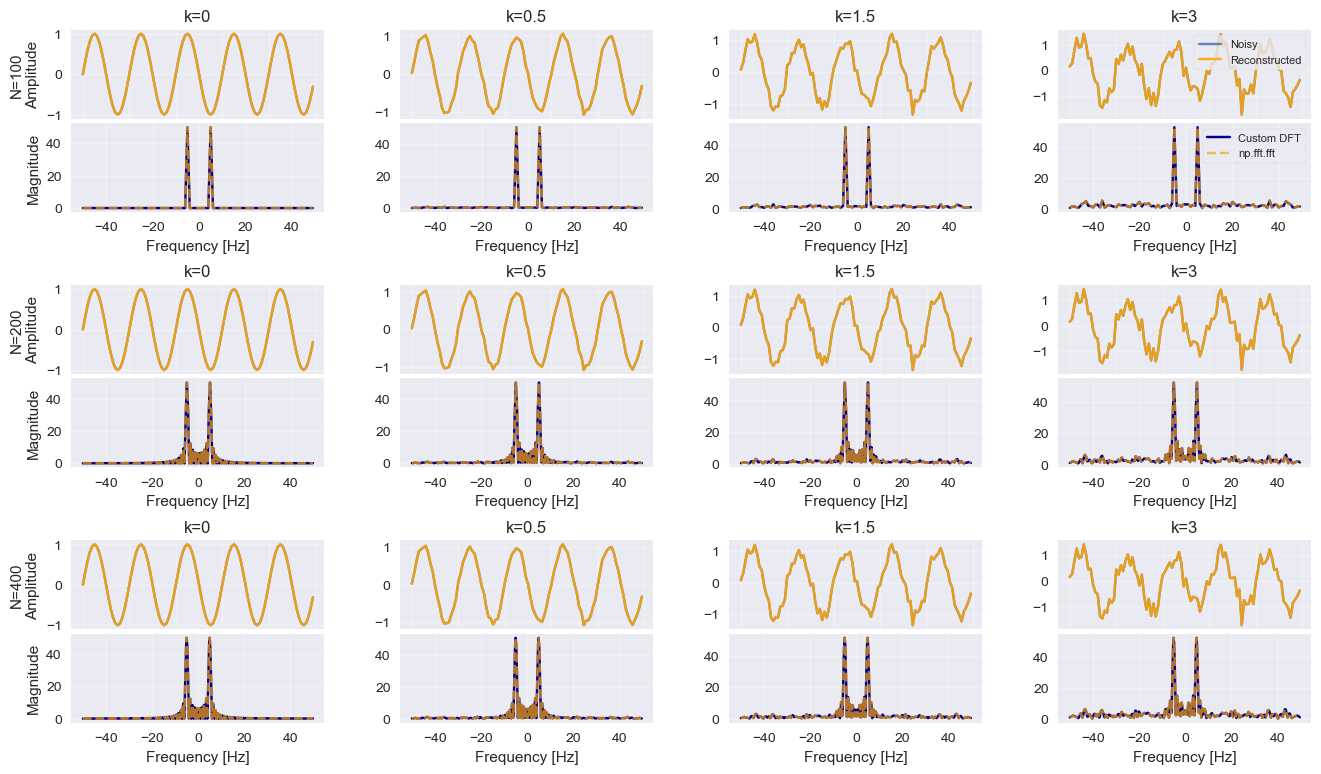

In [2]:
from matplotlib import gridspec
np.random.seed(42)

fs = 100   # Frequência de amostragem
t = np.arange(0, 1, 1/fs)   # Vetor de tempo
f = 5    # Frequência da onda senoidal
x = np.sin(2 * np.pi * f * t)    # Onda senoidal
k = [0,0.5, 1.5, 3]    # Intensidades de ruído
noise = np.random.normal(0, 0.1, x.shape)    # Ruído gaussiano
L = len(x)    # Comprimento do sinal
N = [L, 2*L, 4*L]    # Diferentes comprimentos de DFT

plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(4*len(k), 3*len(N)))
outer = gridspec.GridSpec(len(N), len(k), wspace=0.3, hspace=0.4)

print("Comparison with numpy.fft:\n")
for i, N in enumerate(N):
    for j, k_val in enumerate(k):
        # Sinal ruidoso
        x_noisy = x + k_val * noise

        # DFT e IDFT escaladas para comparar com numpy.fft
        X = DFT(x_noisy, N)    
        x_rec = IDFT(X, N).real
        X = np.fft.fftshift(X)  

        # numpy.fft e numpy.fft.ifft
        X_np = np.fft.fft(x_noisy, n=N)
        x_rec_np = np.fft.ifft(X_np)
        X_np = np.fft.fftshift(X_np)

        # Métrica de erro
        err_max = np.max(np.abs(X - X_np))
        err_mean = np.mean(np.abs(X - X_np))
        print(f"N = {N:2d},k =  {k_val:1f}: Max Error: {err_max:12.4e}, Mean Error: {err_mean:12.4e}")

        # Eixo da frequência
        freqs = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))
        


        # ------- Plotting ------- #

        # Grid interno
        inner = gridspec.GridSpecFromSubplotSpec(
            2, 1, subplot_spec=outer[i, j],
            height_ratios=[1, 1], hspace=0.05
        )

        # Eixo do tempo
        ax_time = plt.Subplot(fig, inner[0])
        ax_time.plot(t, x_noisy, label='Noisy', alpha=0.85)
        ax_time.plot(t, x_rec[:L], label='Reconstructed', alpha=0.85, color='orange')
        if j == 0:
            ax_time.set_ylabel(f'N={N}\nAmplitude')
        ax_time.set_xticklabels([])  
        ax_time.grid(True, alpha=0.3)
        ax_time.set_title(f'k={k_val}')
        if i == 0 and j == len(k) - 1:
            ax_time.legend(fontsize=8, loc='upper right', frameon=True)
        fig.add_subplot(ax_time)

        # Eixo da frequência
        ax_freq = plt.Subplot(fig, inner[1])
        ax_freq.plot(freqs, np.abs(X), color='darkblue')
        ax_freq.plot(freqs, np.abs(X_np), linestyle='--', color='orange', alpha=0.7)
        ax_freq.set_xlabel('Frequency [Hz]')
        if j == 0:
            ax_freq.set_ylabel('Magnitude')
        if i == 0 and j == len(k) - 1:
            ax_freq.legend(['Custom DFT', 'np.fft.fft'], fontsize=8, loc='upper right', frameon=True)
        ax_freq.grid(True, alpha=0.3)
        fig.add_subplot(ax_freq)

plt.show()



## 1.1 Propriedades da DTF


### 1.1.2 Periodicidade e Simetria

#### **Periodicidade**
A DFT de um sinal discreto de comprimento \( N \) é **periódica** com período \( N \) no índice de frequência \( k \):



$$
X[k + N] = X[k], \quad \forall k \in \mathbb{Z}
$$



Isso significa que o espectro obtido pela DFT se repete indefinidamente a cada \( N \) amostras no eixo de frequência.  
Na prática, ao calcular a DFT, obtemos apenas um período fundamental, e qualquer índice fora do intervalo \( 0 \leq k \leq N-1 \) é equivalente a um índice dentro desse intervalo.

---

#### **Simetria (Sinais Reais)**

Quando o sinal no domínio do tempo \( x[n] \) é **real**, sua DFT apresenta **simetria hermitiana**:



$$
X[k] = X^*[-k \ (\text{mod } N)]
$$



onde \( X^* \) denota o conjugado complexo de \( X \).

Essa propriedade implica que:
- **Magnitude:** é simétrica em relação a \( k = 0 \) (ou \( f = 0 \) Hz):


$$
|X[k]| = |X[-k \ (\text{mod } N])|
$$


- **Fase:** é anti-simétrica:


$$
\angle X[k] = -\angle X[-k \ (\text{mod } N])
$$

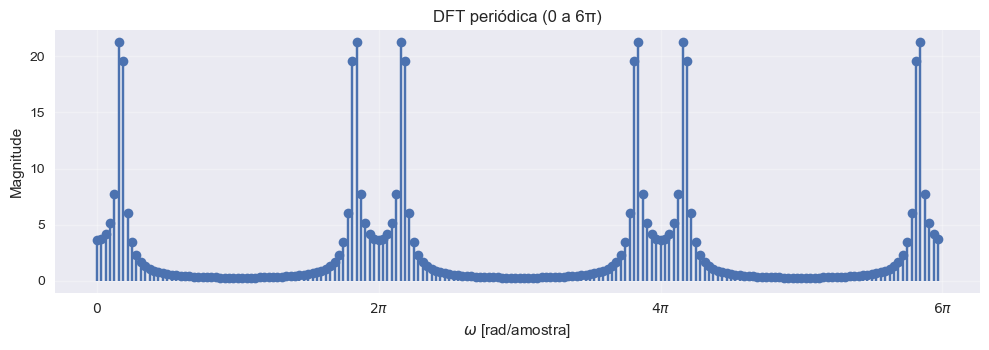

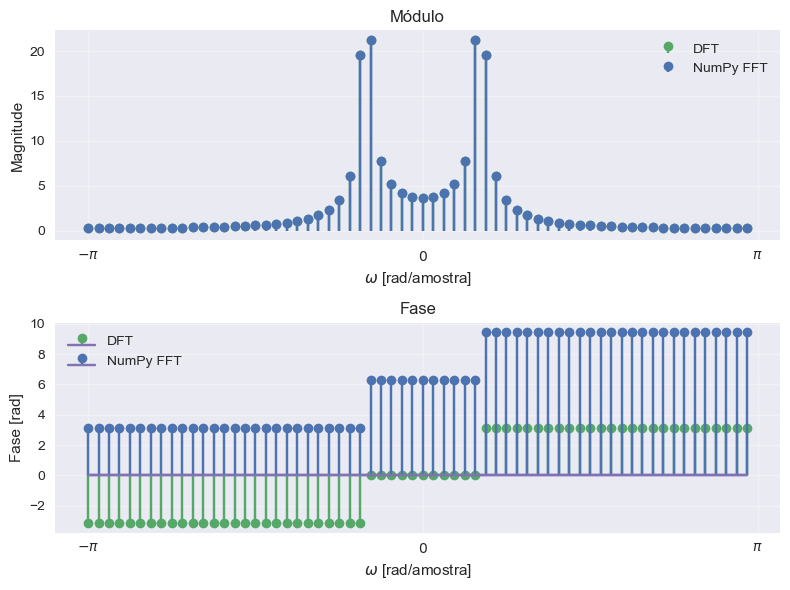

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100
N = 64
n = np.arange(N)
x = np.cos(2 * np.pi * 5.5 * n/N -(np.pi/2))   #Sinal real

#DFT e numpy.fft
X = DFT(x, N)      
X_np = np.fft.fft(x, n=N)          


# 1) Periodicidade

periodos = 3
X_periodic = np.tile(X, periodos)
omega_periodic = np.concatenate([
    2*np.pi*np.arange(N)/N + m*2*np.pi for m in range(periodos)
])

fig1, ax1 = plt.subplots(figsize=(10, 3.6))
ax1.stem(omega_periodic, np.abs(X_periodic), basefmt=" ", linefmt='C0-', markerfmt='C0o')
ax1.set_title('DFT periódica (0 a 6π)')
ax1.set_xlabel(r'$\omega$ [rad/amostra]')
ax1.set_ylabel('Magnitude')
ax1.set_xticks([0, 2*np.pi, 4*np.pi, 6*np.pi])
ax1.set_xticklabels([r'$0$', r'$2\pi$', r'$4\pi$', r'$6\pi$'])
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 2) Simetria hermitiana 
omega_centered = 2 * np.pi * np.arange(-N//2, N//2) / N
X_centered = np.fft.fftshift(X)
X_np_centered = np.fft.fftshift(X_np)

fig2, (ax2, ax3) = plt.subplots(2, 1, figsize=(8, 6))

# --- Magnitude ---
ax2.stem(omega_centered, np.abs(X_centered), basefmt=" ", linefmt='C1-', markerfmt='C1o', label='DFT')
ax2.stem(omega_centered, np.abs(X_np_centered), basefmt=" ", linefmt='C0-', markerfmt='C0o', label='NumPy FFT')
ax2.set_title('Módulo')
ax2.set_xlabel(r'$\omega$ [rad/amostra]')
ax2.set_ylabel('Magnitude')
ax2.set_xticks([-np.pi, 0, np.pi])
ax2.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax2.grid(True, alpha=0.3)
ax2.legend()

# --- Fase ---

# Máscara para ignorar bins com magnitude muito pequena
mask = (np.abs(X_centered) > 1e-10) & (np.abs(X_np_centered) > 1e-10)

phase_my = np.unwrap(np.angle(X_centered[mask]))
phase_np = np.unwrap(np.angle(X_np_centered[mask]))

#ax3.plot(omega_centered[mask], phase_my, 'C1o-', markersize=4, label='Minha DFT')
#ax3.plot(omega_centered[mask], phase_np, 'C0o-', markersize=4, label='NumPy FFT')
ax3.stem(omega_centered[mask], phase_my, 'C1o-', label='DFT')
ax3.stem(omega_centered[mask], phase_np, 'C0o-', label='NumPy FFT')
ax3.set_title('Fase')
ax3.set_xlabel(r'$\omega$ [rad/amostra]')
ax3.set_ylabel('Fase [rad]')
ax3.set_xticks([-np.pi, 0, np.pi])
ax3.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

Observação: S diferença entre as fases geradas pela implementação da DFT deste notebook e da fft do numpy se deve a diferenças numéricas não significativas, em pontos nos quais a amplitude do espectro é praticamente nula, e qualquer variação em ponto flutuante da fase pode gerar saltos de valores próximos a $2\pi rad$, ao usar a função *np.angle()*. Essas diferenças são descartadas ao considerar valores de magniude menores que $e^{-10}$. Ao utilizar *np.unwrap()*, variações bruscas na fase são ignoradas, no entanto, pode-se acumular fases em múltiplos de $2\pi rad$.

No entanto, note que a diferença de fase entre DFT e NumPy FFT são justamente de $2\pi rad$, de modo que são equivalentes. A fase calculada pela DFT ilustra melhor o comportamento da simetria hermitiana: $\angle X[k] = -\angle X[-k \ (\text{mod } N])$

### 1.1.2 Convolução circular

### Convolução Linear

A convolução linear entre dois sinais $ x[n] $ e $ h[n] $, de tamanhos $ L_x $ e $ L_h $, respectivamente, é definida como:

$$
y[n] = \sum_{k=0}^{L_x-1} x[k] \cdot h[n - k] \tag{7}
$$

O resultado tem tamanho $ L_y = L_x + L_h - 1 $, como discutido no notebook de sinais e sistemas no tempo discreto.

### Convolução Circular

A convolução circular assume que os sinais são **periódicos** com período $N $, de modo que:

$$
y(n) = \sum_{l=0}^{n} x(l) \cdot h(n - l) + \sum_{l=n+1}^{N-1} x(l) \cdot h(n - l + N), \quad \text{para } 0 \leq n \leq N - 1 \tag{6}
$$

Sabe-se que a transformada de Fourier da convolução de duas sequências é o produto das transformadas das sequências. No entanto, ao utilizarmos a DFT para essa operação, o processo de amostragem na frequência faz com que as sequências se tornem periódicas no tempo ao aplicarmos a transformada inversa. A equação acima mostra como a IDFT do produto dos espectros das sequências resulta na convolução linear entre as sequências originais e a versão periódica anterior de uma delas.

Para que as Eq.(7) e (6) sejam equivalentes, e obtenhamos uma convolução linear a partir da IDFT, é necessário que o segundo somatório da Eq.(7) seja nulo. Assumindo que as duas sequências originais possuem duração L e K amostras, esse somatório será nulo para: $N \ge L + K - 1$. Ou seja, o tamanho da DFT deve ser grande o suficiente para que a versão periódica anterior da sequência não interfica na convolução da sequência atual.


---

O exemplo abaixo mostra como a partir desta simples escolha, a convolução circular obtida a partir da IDFT do produto das DFTs das duas sequências é equivalente à convolução linear entre as sequências na condição estabelecida.

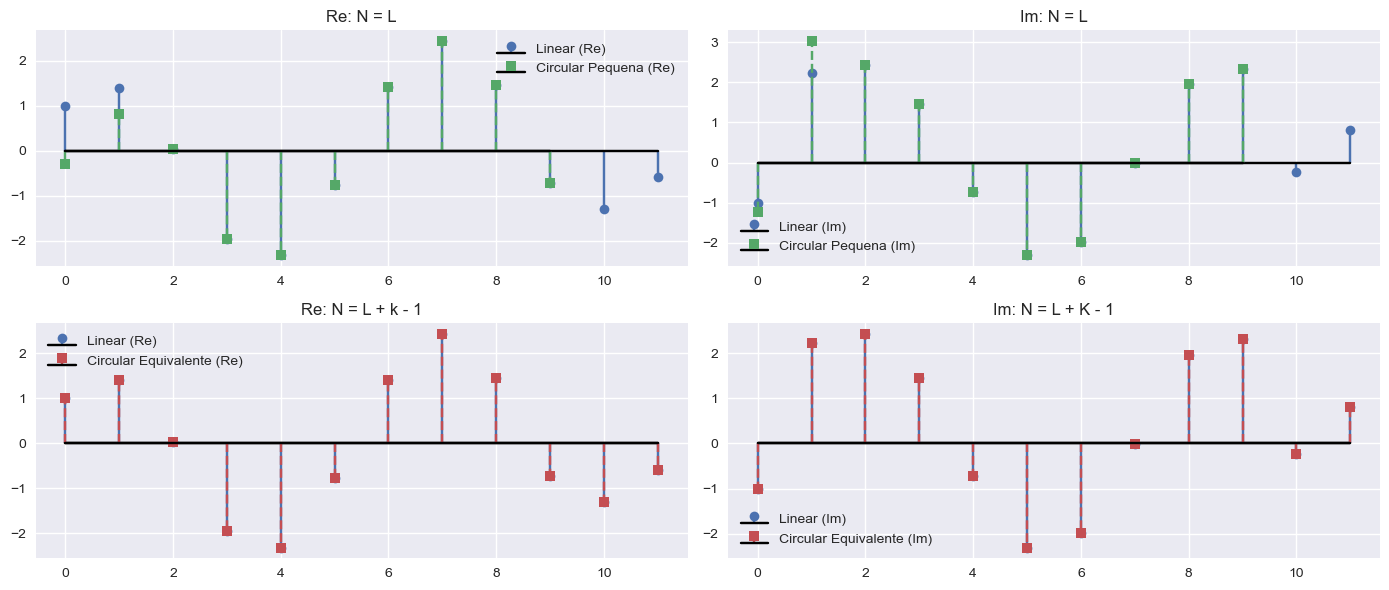

In [4]:
import numpy as np
import matplotlib.pyplot as plt
f = 1.5
L = 10
K = 3
n_x = np.arange(L)

# Sinais complexos
x = np.exp(1j * 2 * np.pi * f * n_x / L)
h = np.array([1 - 1j, 0 + 2j, 1 + 0j])

# Convolução linear
lin_conv = np.convolve(x, h)

#Convolução circular com N insuficiente
N_small = L 
X_small = DFT(x, N_small)
H_small = DFT(h, N_small)
Y_small = X_small * H_small
circ_conv_small = IDFT(Y_small, N_small)

# Comvolução Circular equivalente à linear
N_exact = L + K - 1 
X_exact = DFT(x, N_exact)
H_exact = DFT(h, N_exact)
Y_exact = X_exact * H_exact
circ_conv_exact = IDFT(Y_exact, N_exact)

# --- Plotting --- 
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.stem(np.real(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Re)')
plt.stem(np.real(circ_conv_small), linefmt='C1--', markerfmt='C1s', basefmt='k', label='Circular Pequena (Re)')
plt.title('Re: N = L')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(np.imag(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Im)')
plt.stem(np.imag(circ_conv_small), linefmt='C1--', markerfmt='C1s', basefmt='k', label='Circular Pequena (Im)')
plt.title('Im: N = L')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(np.real(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Re)')
plt.stem(np.real(circ_conv_exact), linefmt='C2--', markerfmt='C2s', basefmt='k', label='Circular Equivalente (Re)')
plt.title('Re: N = L + k - 1')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(np.imag(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Im)')
plt.stem(np.imag(circ_conv_exact), linefmt='C2--', markerfmt='C2s', basefmt='k', label='Circular Equivalente (Im)')
plt.title('Im: N = L + K - 1')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Transforamada rápida de Fourier

